In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("leukemia.csv")

In [3]:
df.head()

,Patient_ID,1563591_at,1570350_at,200063_s_at,206289_at,206847_s_at,208129_x_at,208493_at,208557_at,208604_s_at,...,221691_x_at,221923_s_at,231786_at,235521_at,235753_at,237697_at,238571_at,238808_at,243058_at,Leukemia
0,Sample_1000,3.056436,3.618254,12.641006,5.062973,3.622257,5.536213,3.796584,4.578751,5.061145,...,11.077904,9.686451,2.980329,3.059078,3.780181,3.873638,3.631859,3.032457,5.186670,CLL
1,Sample_1001,2.972746,3.656448,13.009815,5.444977,4.430324,6.629713,4.143195,4.581042,4.815637,...,11.784089,11.272479,3.504151,4.614741,4.456387,3.392600,3.448984,3.547128,5.084203,AML
2,Sample_1002,3.111013,3.910347,12.271732,6.454073,6.612310,7.080542,4.685840,5.839468,5.313898,...,11.022868,10.209611,3.029066,8.911515,6.942798,3.864401,3.886512,3.015252,5.046901,AML
3,Sample_1003,2.882058,3.582897,12.784057,6.593272,4.799354,5.912197,3.515558,5.224020,5.401763,...,11.645520,10.333872,2.632752,7.398745,5.028869,3.845556,3.326164,2.811341,4.803970,AML
4,Sample_1004,3.335401,3.426485,12.671934,6.060153,6.832800,6.332313,3.391523,5.938946,5.526973,...,11.237164,10.486609,2.693749,8.503826,7.260643,3.547633,3.222044,2.904241,5.076562,AML


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient_ID     1273 non-null   object 
 1   1563591_at     1273 non-null   float64
 2   1570350_at     1273 non-null   float64
 3   200063_s_at    1273 non-null   float64
 4   206289_at      1273 non-null   float64
 5   206847_s_at    1273 non-null   float64
 6   208129_x_at    1273 non-null   float64
 7   208493_at      1273 non-null   float64
 8   208557_at      1273 non-null   float64
 9   208604_s_at    1273 non-null   float64
 10  209359_x_at    1273 non-null   float64
 11  209360_s_at    1273 non-null   float64
 12  209905_at      1273 non-null   float64
 13  209905_at.1    1273 non-null   float64
 14  210365_at      1273 non-null   float64
 15  210805_x_at    1273 non-null   float64
 16  211180_x_at    1273 non-null   float64
 17  211181_x_at    1273 non-null   float64
 18  211182_x

In [5]:
df["Leukemia"].unique()

array(['CLL', 'AML', 'ALL', 'CML', 'Nonleukemia'], dtype=object)

In [6]:
df = df.drop("Patient_ID", axis =1 )

In [7]:
df["Leukemia"] = df["Leukemia"].replace(to_replace = "Nonleukemia", value = 0)
df["Leukemia"] = df["Leukemia"].replace(to_replace = ['CLL', 'AML', 'ALL', 'CML'] , value = 1)

In [8]:
df["Leukemia"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='Leukemia', ylabel='count'>

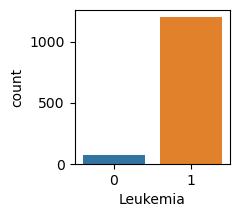

In [9]:
plt.figure(figsize=(2,2))
sns.countplot(data=df, x= df["Leukemia"])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [11]:
# Separate the features and target
x = df.drop('Leukemia', axis=1)
y = df['Leukemia']

# splitting the df into test and train
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Standardize features
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
linear_model = SVC(kernel='linear')

linear_model.fit(x_train, y_train)
ypred = linear_model.predict(x_test)

accuracy_score(ypred, y_test)

0.9424083769633508

In [13]:
poly_model = SVC(kernel='poly')

poly_model.fit(x_train, y_train)
ypred = poly_model.predict(x_test)

accuracy_score(ypred, y_test)

0.9293193717277487

In [14]:
rbf_model = SVC(kernel='rbf')

rbf_model.fit(x_train, y_train)
ypred = rbf_model.predict(x_test)

accuracy_score(ypred, y_test)

0.9476439790575916

In [15]:
sigmoid_model = SVC(kernel='sigmoid')

sigmoid_model.fit(x_train, y_train)
ypred = sigmoid_model.predict(x_test)

accuracy_score(ypred, y_test)

0.9240837696335078